In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from  plotly.offline import iplot
import plotly as py 
import plotly.tools as tls 
 
%matplotlib inline

In [2]:
import plotly as py 

In [3]:
import cufflinks as cf

In [4]:
import scipy.stats as stats

In [5]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
df_train=pd.read_excel("C:\\Users\\Axil Rana\\python2.0\\dataset\\archive\\Data_Train.xlsx")

In [7]:
df_test=pd.read_excel("C:\\Users\\Axil Rana\\python2.0\\dataset\\archive\\Test_set.xlsx")

In [8]:
df=df_train.append(df_test)

C:\Users\Axil Rana\AppData\Local\Temp\ipykernel_18680\3238464827.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [9]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]


In [10]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [11]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [12]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [14]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [15]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [17]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
dtype: int64

In [18]:
df.shape

(13354, 15)

In [19]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)

In [20]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [21]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [22]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':1, '2 stops':2, '1 stop':3, '3 stops':4, 'nan':5, '4 stops':6, 'dtype=object':7})

In [24]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,1.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,3.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,3.0,No info,13302.0,1,3,2019,21,35,16,50


In [25]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,09:25,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [26]:
df.drop(['Route'],axis=1,inplace=True)

In [27]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]


In [31]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,16:55,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,16:55,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [32]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour
0,IndiGo,Banglore,New Delhi,01:10,2h 50m,1.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,13:15,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [ ]:
df.drop(['Destination_hour'],axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Arrival_Time     13354 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  float64
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
 15  Duration_hour    13354 non-null  object 
dtypes: float64(2), int32(7), object(7)
memory usage: 1.4+ MB


In [35]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [36]:
df['Dept_min']=df['Dept_min'].astype(int)

In [37]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour
0,IndiGo,Banglore,New Delhi,01:10,2h 50m,1.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,13:15,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [38]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [ ]:
df.drop(2660,axis=0,inplace=True)

In [40]:
df.drop(['Duration'],axis=1,inplace=True)

In [41]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [42]:
df['Source']=df['Source'].map({'Banglore':1, 'Kolkata':2, 'Delhi':3, 'Chennai':4, 'Mumbai':5})

In [43]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
df['Destination']=df['Destination'].map({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})

In [45]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour
0,IndiGo,1,1,01:10,1.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,2,2,13:15,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [48]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Arrival_Time     13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dept_hour        13351 non-null  int32  
 13  Dept_min         13351 non-null  int32  
 14  Duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(8), int64(2), object(3)
memory usage: 1.7+ MB


In [59]:
from sklearn import preprocessing

In [60]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn import 

In [61]:
Labelencoder=LabelEncoder()

In [62]:
df['Airline']=Labelencoder.fit_transform(df['Airline'])

In [63]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode())

In [64]:
df['Price']=df['Price'].fillna(df['Price'].median())

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Arrival_Time     13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            13351 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dept_hour        13351 non-null  int32  
 13  Dept_min         13351 non-null  int32  
 14  Duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(9), int64(2), object(2)
memory usage: 1.7+ MB


In [69]:
cf.set_config_file(theme='solar')
df.iplot(x = 'Month' , y ='Price', xTitle = "Month" , yTitle = 'Price',kind='bar')

<AxesSubplot:xlabel='Month', ylabel='Price'>

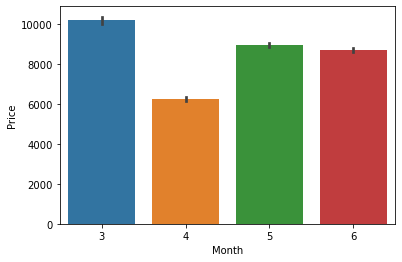

In [74]:
sns.barplot(x='Month',y='Price',data=df)

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

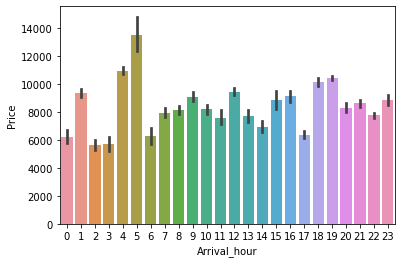

In [75]:
sns.barplot(x='Arrival_hour',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

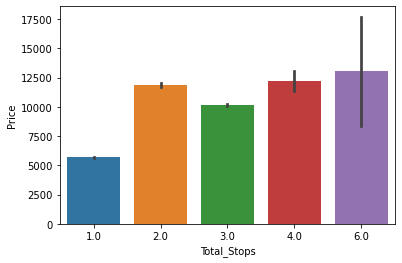

In [76]:
sns.barplot(x='Total_Stops',y='Price',data=df)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

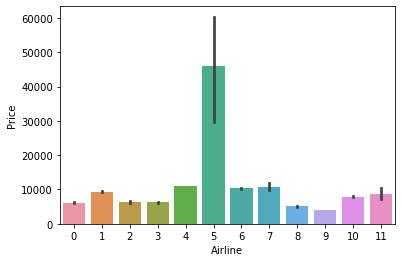

In [77]:
sns.barplot(x='Airline',y='Price',data=df)